In [2]:
import os, sys
# notebooks/에서 한 단계 위로 올라간 폴더를 PATH에 추가
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
from env.custom_maze_env import CustomMazeEnv
from env.get_retina_image import reconstruct
from minigrid.wrappers import RGBImgPartialObsWrapper, ImgObsWrapper
import time
import matplotlib.pyplot as plt
import numpy as np


# 환경 생성 후 map visualize

Start: (np.int64(11), np.int64(15)) Goal: (0, 3)


(np.float64(-0.5), np.float64(671.5), np.float64(671.5), np.float64(-0.5))

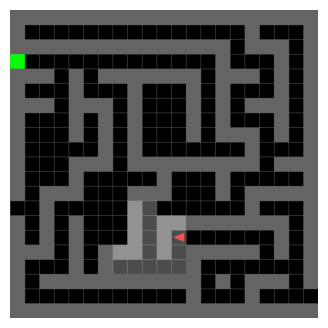

In [34]:
from env.custom_maze_env import CustomMazeEnv
import matplotlib.pyplot as plt

env = CustomMazeEnv(
    layout_id="c",
    goal_pos=(0,3),
    view_size=5,
    max_steps=250,
    tile_size=32,
    render_mode="rgb_array"    # ← 이 인자로 배열 반환이 활성화
)

obs, _ = env.reset(seed=40)
print("Start:", obs["position"], "Goal:", env.goal_pos)

img = env.render()           # 이제 numpy RGB array 반환!
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis("off")


## 환경 설명

obs['view']는 3가지 key를 가진 딕셔너리
> obs['view']['image'] : (5, 5, 3) 모양의 격자 기반의 관측 정보( “픽셀 사진” 아님)

> obs['view']['direction'] : int로 방향을 매핑(left : 2 , up : 3, down : 1, right :0)

> obs['view']['mission'] : 사전 설정한 목표

# 환경 1인칭 view(Top_down)

Start: (np.int64(11), np.int64(15))
Goal: (0, 3)


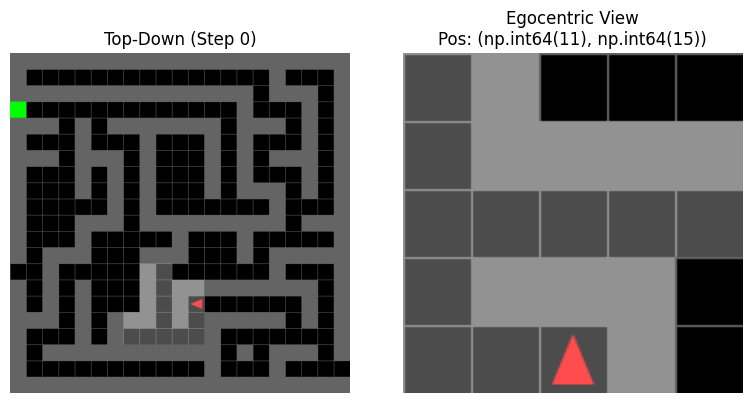

In [40]:
# 1) 원본 env
base_env = CustomMazeEnv(
    layout_id="c",
    goal_pos=(0,3),
    view_size=5,
    max_steps=250,
    tile_size=32,
    render_mode="rgb_array"
)

# 2) 픽셀Obs 래퍼 씌우기
env = RGBImgPartialObsWrapper(base_env, tile_size=32)

# 3) reset/step 은 래퍼 env로
obs, _ = env.reset(seed=40)
print("Start:", obs["position"])

# 4) 원본 goal_pos 읽기 (unwrap)
print("Goal:", env.unwrapped.goal_pos)

# 5) 탑다운 렌더링
top_down_view = env.render()
fp_view = obs['image']  

# 2열 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.imshow(top_down_view)
ax1.set_title(f"Top-Down (Step {obs['timestep']})")
ax1.axis("off")

ax2.imshow(fp_view)
ax2.set_title(f"Egocentric View\nPos: {obs['position']}")
ax2.axis("off")

plt.tight_layout()
plt.show()


# 1인칭 egocentric_view

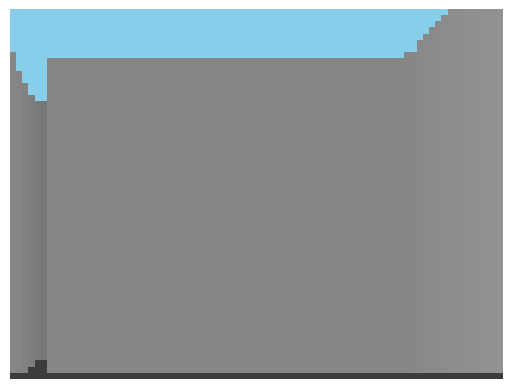

In [41]:
fp_view = obs['image']  
egocentric_view = reconstruct(fp_view)
plt.imshow(egocentric_view)
plt.axis("off")
plt.show()

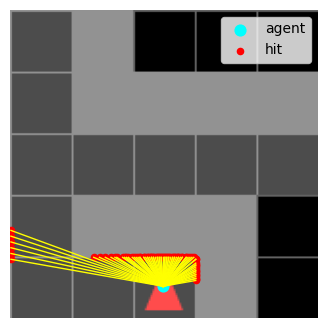

(60, 80, 3)


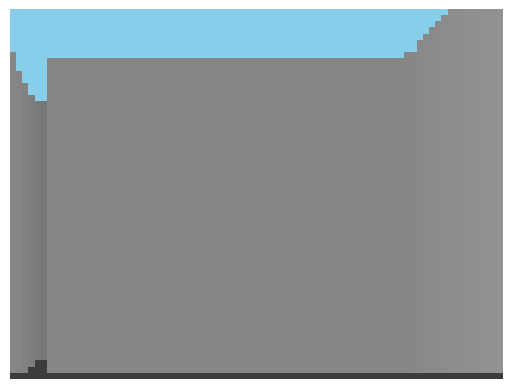

In [46]:
fp_view = obs['image']  
egocentric_view = reconstruct(fp_view,render_mode=True)
print(egocentric_view.shape)
plt.imshow(egocentric_view)
plt.axis("off")
plt.show()

(60, 80)


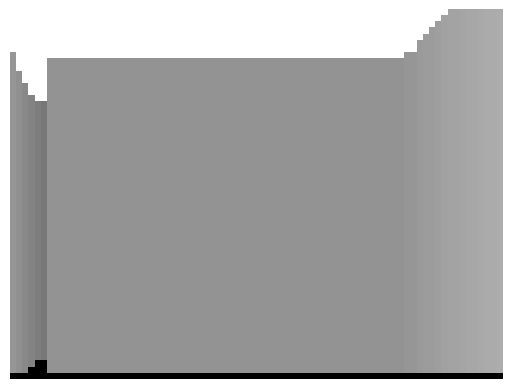

In [47]:
fp_view = obs['image']  
egocentric_view = reconstruct(fp_view, render_chanel=1)
print(egocentric_view.shape)
plt.imshow(egocentric_view,cmap="gray")
plt.axis("off")
plt.show()